In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('/content/estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv')

In [23]:
df.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3


In [24]:
df.shape

(2086, 15)

In [25]:
df.describe()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1.702045,86.622985,0.817354,0.045062,0.026366,0.639326,0.709818,0.763670,0.379834,0.504361,0.337873,0.843202,0.855417,0.499760,3.110259
std,0.093419,26.256245,0.386469,0.207491,0.160260,0.769120,0.267493,0.645761,0.155956,0.306578,0.283687,0.537726,0.518064,0.353723,1.993832
min,1.450000,39.000000,0.000000,0.000000,0.000000,0.361418,0.000000,0.002375,0.000000,0.000000,0.000000,0.000146,0.516552,0.000000,0.000000
25%,1.630000,65.130595,1.000000,0.000000,0.000000,0.361418,0.500000,0.404704,0.333333,0.291005,0.042901,0.466622,0.516552,0.250000,1.000000
50%,1.701383,83.000000,1.000000,0.000000,0.000000,0.361418,0.695087,0.404704,0.333333,0.500000,0.333333,0.813973,0.516552,0.500000,3.000000
75%,1.768770,108.009452,1.000000,0.000000,0.000000,0.361418,1.000000,1.031717,0.333333,0.740243,0.557356,1.092724,1.439033,0.750000,5.000000
max,1.980000,165.057269,1.000000,1.000000,1.000000,2.766876,1.000000,2.164116,1.000000,1.000000,1.000000,2.194694,4.427721,1.000000,6.000000


In [26]:
df.dtypes

,0
Height,float64
Weight,float64
family_history_with_overweight,int64
SCC,int64
MTRANS_Walking,int64
FAVC_z,float64
FCVC_minmax,float64
NCP_z,float64
CAEC_minmax,float64
CH2O_minmax,float64


In [27]:
df.isnull().sum()

,0
Height,0
Weight,0
family_history_with_overweight,0
SCC,0
MTRANS_Walking,0
FAVC_z,0
FCVC_minmax,0
NCP_z,0
CAEC_minmax,0
CH2O_minmax,0


In [28]:
df.duplicated().sum()

24

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(2062, 15)

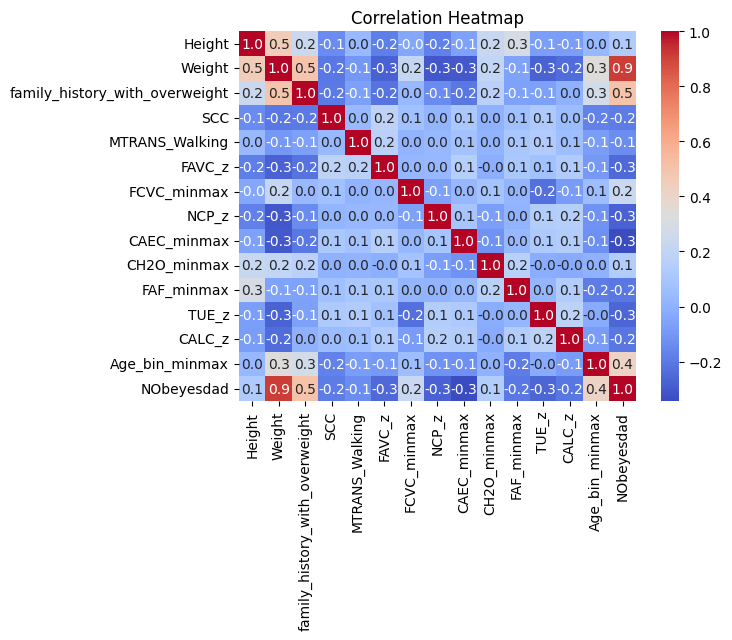

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [35]:
X=df.drop(['NObeyesdad'],axis=1)
y=df['NObeyesdad']

In [40]:
X=scaler.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

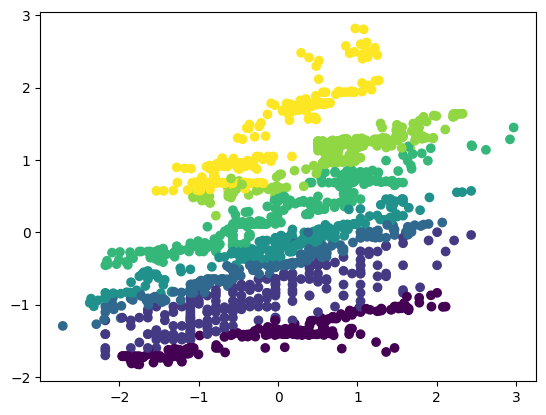

In [43]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
model=SVC(kernel='linear',C=10)
model.fit(X_train,y_train)

SVC(C=10, kernel='linear')

In [53]:
y_pred=model.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Accuracy:")
print(accuracy_score(y_test,y_pred))
print("Precision:")
print(precision_score(y_test,y_pred,average='weighted'))
print("Recall:")
print(recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:")
print(f1_score(y_test,y_pred,average='weighted'))


Confusion Matrix
[[50  2  0  0  0  0  0]
 [ 2 57  2  0  0  0  0]
 [ 0  5 40  1  0  0  0]
 [ 0  0  2 50  1  0  0]
 [ 0  0  0  0 68  1  0]
 [ 0  0  0  0  0 58  0]
 [ 0  0  0  0  0  0 74]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.89      0.93      0.91        61
           2       0.91      0.87      0.89        46
           3       0.98      0.94      0.96        53
           4       0.99      0.99      0.99        69
           5       0.98      1.00      0.99        58
           6       1.00      1.00      1.00        74

    accuracy                           0.96       413
   macro avg       0.96      0.96      0.96       413
weighted avg       0.96      0.96      0.96       413

Accuracy:
0.9612590799031477
Precision:
0.9615594195749387
Recall:
0.9612590799031477
F1 Score:
0.9612268785828106
